In [6]:
import matplotlib
import numpy as np
import safim
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] =15,10
matplotlib.rcParams.update({'font.size' : 18})

Model parameters

In [7]:
# Aspect ratio of the iceberg
eps = 0.25
# Iceberg's height (the biggest dimension in 2D)
H = 800. # (m) 
# Initial inclination angle
theta_0 = 1. # (degree)
# Water density
rho_w = 1025. # (kg/m^3)
# Ice density
rho_i = 920. # (kg/m^3)
# Simulation time
tmax = 200. # (s)
# Acceleration of gravity
g = 9.8 # (m/s^2)
# Number of time steps. Automatically computed, no need to change.
Ntime = tmax/np.sqrt(H/g) * 90.35 # Number of time steps. The factor 90.35 is universal.
# Time step. Automatically computed, no need to change.
dt = tmax/float(Ntime)
# Initial vertical shift from the vertical hydrostatic equilibrium: dz > 0 above its hydrostatic eq., dz < 0 - below
dz =  0. # (m)
# Drag factor
alpha = 1. # (-)
# Added mass factors for x,z and moment of inertia
cmx = 0. # (-)
cmz = 0. # (-)
cmI = 0. # (-)
# 
resultsfile = "Results.npz"

Create iceberg

In [8]:
# Create an iceberg and do the simulation
theta_0 *= np.pi/180. # Now, theta is in rad
# Compute initial vertical position of the center of mass of the iceberg
zg0 = -(rho_i/rho_w - 0.5)*H*np.cos(theta_0) + dz
iceberg = safim.Iceberg(np.array([0.,zg0,0.]), [0,0,theta_0], eps*H, H, alpha, rho_i, rho_w)

Run simulations and save results in a file

In [9]:
time,x,z,theta,Fx,Fz,My = safim.Simu(iceberg, dt, tmax, cmx, cmz, cmI)
np.savez("Results.npz",time=time,x=x,z=z,theta=theta,Fx=Fx,Fz=Fz,My=My)

Plot results

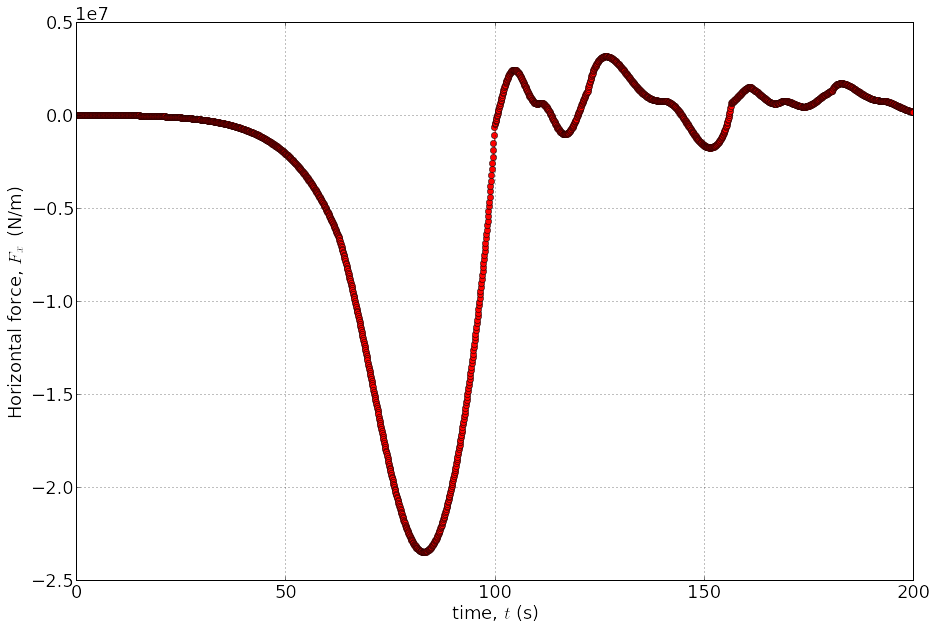

In [10]:
npzfile = np.load(resultsfile)
t = npzfile['time']

Fx = npzfile['Fx']

fig,ax = plt.subplots()
plt.grid(True)
plt.plot(time, Fx, "o-", color="r")
plt.xlabel("time, $t$ (s)")
plt.ylabel("Horizontal force, $F_x$ (N/m)")
fig.savefig("Force_x.pdf")

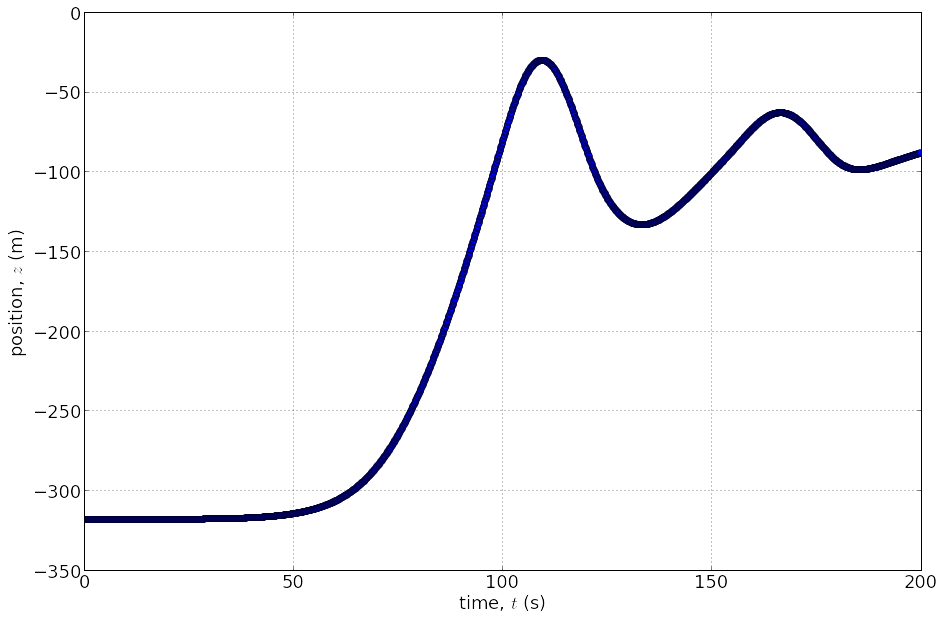

In [11]:
z = npzfile['z']

fig,ax = plt.subplots()
plt.grid(True)
plt.plot(time, z, "o-", color="b")
plt.xlabel("time, $t$ (s)")
plt.ylabel("position, $z$ (m)")
fig.savefig("Coord_z.pdf")

npzfile.close()